# Loading the dataset

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from sklearn import decomposition
import seaborn
from  matplotlib import pyplot
from matplotlib.pyplot import figure
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df_new = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 
# Skip all white-spaces.

In [707]:
df_new = df_new.replace(r'^\s*$', np.NaN, regex=True)
print("Initial dataframe shape [rows, columns]:", df.shape)
n_NaN = df_new.isna().sum().sum()
print(n_NaN) # As you can see the total number of NaNs in the database 3199, so we need to impute.

Initial dataframe shape [rows, columns]: (331, 78)
3201


In [713]:
df_new.reset_index(drop=True, inplace=True)
df_new.head(3)

City  cityID  clusterID            Typology        Country  \
0  Baltimore(MD)     285          7         Auto Sprawl  United States   
1      Melbourne      10          8     Auto Innovative      Australia   
2         Niamey     186          1  Congested Emerging          Niger   

   Car Modeshare (%)  Public Transit Modeshare (%)  Bicycle Modeshare (%)  \
0               85.0                           6.1                    0.3   
1               80.0                          14.0                    2.0   
2                NaN                           9.0                    2.0   

   Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
0                    2.6                             0.66   
1                    4.0                             1.11   
2                   60.0                             1.02   

   Road Deaths Rate (per 1000)  Subway Length (km)  \
0                          8.5                24.9   
1                          5.4                 0.0   
2                         26.4                 0.0   

   Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
0                        0.013409                              0.615385   
1                        0.000000                              0.000000   
2                        0.000000                              0.000000   

   Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
0                     6.417582                  34              0.0   
1                     0.000000                   0              0.0   
2                     0.000000                   0              0.0   

   BRT System Length Density (per km)  \
0                                 0.0   
1                                 0.0   
2                                 0.0   

   BRT Stations per Hundred Thousand Persons  \
0                                        0.0   
1                                        0.0   
2                                        0.0   

   BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
0                                     0.0                              0.0   
1                                     0.0                              0.0   
2                                     0.0                              0.0   

   BRT Age (years)  Bikeshare Stations  \
0              0.0                50.0   
1              0.0                50.0   
2              0.0                 0.0   

   Bikeshare Stations per Hundred Thousand Persons  Bikeshare Number of Bikes  \
0                                         2.197802                        NaN   
1                                         1.264223                      600.0   
2                                         0.000000                        0.0   

   Bikeshare Bicycles per Hundred Thousand Persons  Bikeshare Age (years)  \
0                                          0.00000                    2.0   
1                                         15.17067                    2.0   
2                                          0.00000                    0.0   

   Congestion (%)  Congestion AM Peak (%)  Congestion PM Peak (%)  \
0            19.0                    33.0                    46.0   
1            33.0                    55.0                    58.0   
2             NaN                     NaN                     NaN   

   Traffic Index  Travel Time Index  Inefficiency Index  Population  \
0         148.97              36.90              150.22     2275000   
1         143.12              35.57              138.17     3955000   
2            NaN                NaN                 NaN     1435000   

   Land Area (sq. km)  Population Density (per sq. km)  \
0                1857                             1200   
1                2543                             1500   
2                 130                            11100   

   Population Change 1990 – 2000  Population Change 2000 – 2010  \
0                     

# Importing transport modal shares 

As a Transportation engineering student, I would like to focus on modelling and predicting relationships between transportation infrastructure related variables. Modeshares are mostly filled in European countries and USA. With 30 cities in the dataset Chinese cities creates 9% of all observations. The modeshares for Chinese cities will be imported as country's mean values and afterwards scaled, so they sum up to 100%. Same approach is applied on Indian cities. Other big countries like Russia,Mexico, Brazil etc. will have their modeshares imported from external data sources.


## Russia
Firts, lets have a look on Russian cities

In [46]:
df_new.loc[(df_new['Country'] == 'Russia')]

City  cityID  clusterID           Typology Country  \
9      Yekaterinburg   209.0        2.0  BusTransit Sprawl  Russia   
41            Samara   211.0        2.0  BusTransit Sprawl  Russia   
49   Nizhny Novgorod   210.0        2.0  BusTransit Sprawl  Russia   
231   St. Petersburg   207.0        2.0  BusTransit Sprawl  Russia   
271      Novosibirsk   208.0        2.0  BusTransit Sprawl  Russia   
292           Moscow   206.0        2.0  BusTransit Sprawl  Russia   
317            Kazan   212.0        2.0  BusTransit Sprawl  Russia   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
9                  NaN                           NaN                   NaN   
41                 NaN                           NaN                   NaN   
49                 NaN                           NaN                   NaN   
231                NaN                           NaN                   NaN   
271                NaN                           NaN                   NaN   
292               26.0                          49.0                   NaN   
317               33.0                          67.0                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
9                      NaN                             0.73   
41                     NaN                             0.71   
49                     NaN                             0.71   
231                    NaN                             0.72   
271                    NaN                             0.70   
292                   24.0                             0.73   
317                    NaN                             0.73   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
9                           18.9                12.7   
41                          18.9                12.7   
49                          18.9                18.8   
231                         18.9               113.2   
271                         18.9                15.9   
292                          7.0               338.8   
317                         18.9                15.8   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
9                          0.024517                              0.659341   
41                         0.051626                              0.873362   
49                         0.030225                              1.176471   
231                        0.084039                              1.303502   
271                        0.025563                              0.872483   
292                        0.063804                              1.225106   
317                        0.035909                              0.873362   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
9                      38.021978                26.0              0.0   
41                     13.624454                30.0              0.0   
49                     31.260504                32.0              0.0   
231                   148.463035                62.0              0.0   
271                    58.859060                31.0              0.0   
292                   147.917924                82.0              0.0   
317                    25.502183                12.0              0.0   

     BRT System Length Density (per km)  \
9                                   0.0   
41                                  0.0   
49                                  0.0   
231                                 0.0   
271                                 0.0   
292                                 0.0   
317                                 0.0   

     BRT Stations per Hundred Thousand Persons  \
9                                          0.0   
41                                         0.0   
49                                         0.0   
231                                        0.0   
271                                        0.0   
292                          

All Russian cities are in same typology category with predominant public transpor
Based on statistics of Saint Petersburg modeshares https://cyberleninka.ru/article/n/analiz-transportnoy-sistemy-sankt-peterburga-i-vozmozhnosti-povysheniya-v-ney-roli-prigorodnyh-zheleznyh-dorog/viewer
And Moscow Modeshares
https://megaobuchalka.ru/12/6677.html
Modeshares for other Russian cities will be imputed as average of available observations.

In [47]:
#First lets impute Saint Petersburg modeshares to other Russian cities
indices = [9,41,49,231,271,317]
df_new.at[292,['Bicycle Modeshare (%)']]=np.array([0])
df_new.at[indices,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([34, 64, 1,1])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
#importing temperatures from https://ekaterinburg.nuipogoda.ru/, https://samara.nuipogoda.ru etc, making average from daily and nightly values and converting to fahrenheit
df_new.at[9,['AvgTemperature']]=np.array([30.2])
df_new.at[41,['AvgTemperature']]=np.array([35.6])
df_new.at[49,['AvgTemperature']]=np.array([32.9])
df_new.at[231,['AvgTemperature']]=np.array([38.3])
df_new.at[271,['AvgTemperature']]=np.array([2.3])
df_new.at[317,['AvgTemperature']]=np.array([32])
#import Ukraine cities temperature observations from same website
df_new.at[21,['AvgTemperature']]=np.array([37.4])
df_new.at[284,['AvgTemperature']]=np.array([54.5])

As a former Soviet Union part, Ukraine Cities has same typologoy as Russian cities. It is reasonable to impute Odessa and Kharkiv modeshares with Russian cities values. For capital city, Kiev modehsares data are imported from: https://www.slideshare.net/EMBARQNetwork/revision-of-kievs-ground-transport-network-through-data-collection-transforming-transportation-2016


In [ ]:

df_new.at[284,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([34, 64, 1,1])
df_new.at[21,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([34, 64, 1,1])
df_new.at[306,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([28, 37, 0,35])

## China

In [49]:
df_china=df_new.loc[(df_new['Country'] == 'China')]
df_china

City  cityID  clusterID            Typology Country  \
4          Urumqi    67.0       12.0  MetroBike Emerging   China   
16          Hefei    68.0       12.0  MetroBike Emerging   China   
19         Dalian    63.0       12.0  MetroBike Emerging   China   
32      Chongqing    47.0       11.0     MetroBike Giant   China   
54        Chengdu    51.0       12.0  MetroBike Emerging   China   
77          Wuhan    48.0       12.0  MetroBike Emerging   China   
78       Changsha    66.0       12.0  MetroBike Emerging   China   
83          Jinan    60.0       12.0  MetroBike Emerging   China   
85       Shenzhen    46.0       11.0     MetroBike Giant   China   
89      Guangzhou    45.0       11.0     MetroBike Giant   China   
125        Harbin    53.0       12.0  MetroBike Emerging   China   
130      Shenyang    54.0       12.0  MetroBike Emerging   China   
148        Xiamen    71.0       12.0  MetroBike Emerging   China   
150       Beijing    44.0       11.0     MetroBike Giant   China   
152     Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155       Taiyuan    61.0       12.0  MetroBike Emerging   China   
167  Shijiazhuang    70.0       12.0  MetroBike Emerging   China   
183      Hangzhou    55.0       12.0  MetroBike Emerging   China   
187        Fuzhou    69.0       12.0  MetroBike Emerging   China   
194       Qingdao    58.0       12.0  MetroBike Emerging   China   
213       Kunming    62.0       12.0  MetroBike Emerging   China   
222       Tianjin    49.0       12.0  MetroBike Emerging   China   
250     Changchun    59.0       12.0  MetroBike Emerging   China   
272       Nanjing    52.0       12.0  MetroBike Emerging   China   
273        Suzhou    64.0       12.0  MetroBike Emerging   China   
293       Xi‚Äôan    56.0       12.0  MetroBike Emerging   China   
299      Shanghai    43.0       11.0     MetroBike Giant   China   
304      Dongguan    50.0       12.0  MetroBike Emerging   China   
311        Ningbo    72.0       12.0  MetroBike Emerging   China   
322          Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
4                21.70                         54.70                   NaN   
16               42.00                         24.60                   2.7   
19                 NaN                         43.00                   NaN   
32               20.60                         32.60                   NaN   
54               11.00                         15.00                   NaN   
77                 NaN                           NaN                   NaN   
78                 NaN                           NaN                   3.2   
83                 NaN                           NaN                   NaN   
85               19.30                         16.70                   6.2   
89               21.00                         32.00                     9   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
150              21.00                         26.00                    32   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
167               5.00                          7.16                 47.28   
183                NaN                           NaN                   NaN   
187                NaN                           NaN                    37   
194                NaN                           NaN                   NaN   
213              22.10                         25.20                  55.3   
222              27.80                         42.00                 13.85   
250              20.00                         33.00                    10   
272                NaN          

According to arcitcle https://www.intechopen.com/online-first/the-rise-and-decline-of-car-use-in-beijing-and-shanghai car traffic growth in two major Chinese cities , Beijing and Shangai, has already reached its peak values. Because majority of available modalshares are in similar ranges ( for cars around 20%), it seems reasonable to impute modalshares on the basis mean value of Chinese cities with subjective rounding so the final sum is 100% 

In [51]:
car =df_new.loc[df_new['Country'] == 'China', 'Car Modeshare (%)'].mean()
car

21.22533333333333

In [52]:
publictransit =df_new.loc[df_new['Country'] == 'China', 'Public Transit Modeshare (%)'].mean()
publictransit

34.20125

In [53]:
bike=df_new.loc[df_new['Country'] == 'China', 'Bicycle Modeshare (%)'].mean()
bike

22.509285714285713

In [54]:
walking = df_new.loc[df_new['Country'] == 'China', 'Walking Modeshare (%)'].mean()
walking

27.345384615384617

In [55]:
pd.DataFrame(df_china[df_china['Car Modeshare (%)'].isna() &df_china['Bicycle Modeshare (%)'].isna() & df_china['Walking Modeshare (%)'].isna() & df_china['Public Transit Modeshare (%)'].isna() ])

City  cityID  clusterID            Typology Country  \
77       Wuhan    48.0       12.0  MetroBike Emerging   China   
83       Jinan    60.0       12.0  MetroBike Emerging   China   
125     Harbin    53.0       12.0  MetroBike Emerging   China   
130   Shenyang    54.0       12.0  MetroBike Emerging   China   
148     Xiamen    71.0       12.0  MetroBike Emerging   China   
152  Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155    Taiyuan    61.0       12.0  MetroBike Emerging   China   
183   Hangzhou    55.0       12.0  MetroBike Emerging   China   
194    Qingdao    58.0       12.0  MetroBike Emerging   China   
273     Suzhou    64.0       12.0  MetroBike Emerging   China   
322       Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
77                 NaN                           NaN                   NaN   
83                 NaN                           NaN                   NaN   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
183                NaN                           NaN                   NaN   
194                NaN                           NaN                   NaN   
273                NaN                           NaN                   NaN   
322                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
77                     NaN                             1.16   
83                     NaN                             1.16   
125                    NaN                             1.16   
130                    NaN                             1.16   
148                    NaN                             1.16   
152                    NaN                             1.16   
155                    NaN                             1.16   
183                    NaN                             1.16   
194                    NaN                             1.16   
273                    NaN                             1.16   
322                    NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
77                          18.8              128.70   
83                          18.8                0.00   
125                         18.8               17.50   
130                         18.8               55.10   
148                         18.8                0.00   
152                         18.8               45.39   
155                         18.8                0.00   
183                         18.8               81.50   
194                         18.8               12.00   
273                         18.8               66.14   
322                         18.8               56.00   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
77                         0.097426                              1.338583   
83                         0.000000                              0.000000   
125                        0.030702                              0.366226   
130                        0.054554                              0.693548   
148                        0.000000                              0.000000   
152                        0.035050                              0.625543   
155                        0.000000                              0.000000   
183                        0.064224                              0.749507   
194                        0.007533                              0.167504   
273                        0.052120                              1.096654   
322            

In [56]:
#imputing rows with nan values

indices = [77,83,125,130,148,152,155,183,194,273,322]
df_new.at[indices,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21, 34, 22,23])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
pd.DataFrame(df_china[df_china['Bicycle Modeshare (%)'].isna()])

In [58]:
df_new.at[4,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21.7, 54.7, 18,6.6])
df_new.at[32,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([20.6, 32.6, 0.5,46.3])
df_new.at[54,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([11, 15, 44,20])
df_new.at[304,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([40, 60, 0,0])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
pd.DataFrame(df_china[df_china['Walking Modeshare (%)'].isna()])

In [60]:
df_new.at[16,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([42, 24.6, 2.7,19.3])


C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:

pd.DataFrame(df_china[df_china['Public Transit Modeshare (%)'].isna()])

City  cityID  clusterID            Typology Country  \
77       Wuhan    48.0       12.0  MetroBike Emerging   China   
78    Changsha    66.0       12.0  MetroBike Emerging   China   
83       Jinan    60.0       12.0  MetroBike Emerging   China   
125     Harbin    53.0       12.0  MetroBike Emerging   China   
130   Shenyang    54.0       12.0  MetroBike Emerging   China   
148     Xiamen    71.0       12.0  MetroBike Emerging   China   
152  Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155    Taiyuan    61.0       12.0  MetroBike Emerging   China   
183   Hangzhou    55.0       12.0  MetroBike Emerging   China   
187     Fuzhou    69.0       12.0  MetroBike Emerging   China   
194    Qingdao    58.0       12.0  MetroBike Emerging   China   
272    Nanjing    52.0       12.0  MetroBike Emerging   China   
273     Suzhou    64.0       12.0  MetroBike Emerging   China   
322       Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
77                 NaN                           NaN                   NaN   
78                 NaN                           NaN                   3.2   
83                 NaN                           NaN                   NaN   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
183                NaN                           NaN                   NaN   
187                NaN                           NaN                    37   
194                NaN                           NaN                   NaN   
272                NaN                           NaN                    39   
273                NaN                           NaN                   NaN   
322                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
77                     NaN                             1.16   
78                     NaN                             1.16   
83                     NaN                             1.16   
125                    NaN                             1.16   
130                    NaN                             1.16   
148                    NaN                             1.16   
152                    NaN                             1.16   
155                    NaN                             1.16   
183                    NaN                             1.16   
187                   26.0                             1.16   
194                    NaN                             1.16   
272                   20.0                             1.16   
273                    NaN                             1.16   
322                    NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
77                          18.8              128.70   
78                          18.8               50.20   
83                          18.8                0.00   
125                         18.8               17.50   
130                         18.8               55.10   
148                         18.8                0.00   
152                         18.8               45.39   
155                         18.8                0.00   
183                         18.8               81.50   
187                         18.8               24.89   
194                         18.8               12.00   
272                         18.8              224.30   
273                         18.8               66.14   
322                         18.8               56.00   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \

In [62]:
df_new.at[19,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21, 43, 20,16])
df_new.at[78,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([23.8, 43, 20,3.2])
df_new.at[187,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([17, 23, 37,26])
df_new.at[272,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([17, 24, 39,20])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
df_new.loc[(df_new['Country'] == 'China')]

City  cityID  clusterID            Typology Country  \
4          Urumqi    67.0       12.0  MetroBike Emerging   China   
16          Hefei    68.0       12.0  MetroBike Emerging   China   
19         Dalian    63.0       12.0  MetroBike Emerging   China   
32      Chongqing    47.0       11.0     MetroBike Giant   China   
54        Chengdu    51.0       12.0  MetroBike Emerging   China   
77          Wuhan    48.0       12.0  MetroBike Emerging   China   
78       Changsha    66.0       12.0  MetroBike Emerging   China   
83          Jinan    60.0       12.0  MetroBike Emerging   China   
85       Shenzhen    46.0       11.0     MetroBike Giant   China   
89      Guangzhou    45.0       11.0     MetroBike Giant   China   
125        Harbin    53.0       12.0  MetroBike Emerging   China   
130      Shenyang    54.0       12.0  MetroBike Emerging   China   
148        Xiamen    71.0       12.0  MetroBike Emerging   China   
150       Beijing    44.0       11.0     MetroBike Giant   China   
152     Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155       Taiyuan    61.0       12.0  MetroBike Emerging   China   
167  Shijiazhuang    70.0       12.0  MetroBike Emerging   China   
183      Hangzhou    55.0       12.0  MetroBike Emerging   China   
187        Fuzhou    69.0       12.0  MetroBike Emerging   China   
194       Qingdao    58.0       12.0  MetroBike Emerging   China   
213       Kunming    62.0       12.0  MetroBike Emerging   China   
222       Tianjin    49.0       12.0  MetroBike Emerging   China   
250     Changchun    59.0       12.0  MetroBike Emerging   China   
272       Nanjing    52.0       12.0  MetroBike Emerging   China   
273        Suzhou    64.0       12.0  MetroBike Emerging   China   
293       Xi‚Äôan    56.0       12.0  MetroBike Emerging   China   
299      Shanghai    43.0       11.0     MetroBike Giant   China   
304      Dongguan    50.0       12.0  MetroBike Emerging   China   
311        Ningbo    72.0       12.0  MetroBike Emerging   China   
322          Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
4                21.70                         54.70                    18   
16               42.00                         24.60                   2.7   
19               21.00                         43.00                    20   
32               20.60                         32.60                   0.5   
54               11.00                         15.00                    44   
77               21.00                         34.00                    22   
78               23.80                         43.00                    20   
83               21.00                         34.00                    22   
85               19.30                         16.70                   6.2   
89               21.00                         32.00                     9   
125              21.00                         34.00                    22   
130              21.00                         34.00                    22   
148              21.00                         34.00                    22   
150              21.00                         26.00                    32   
152              21.00                         34.00                    22   
155              21.00                         34.00                    22   
167               5.00                          7.16                 47.28   
183              21.00                         34.00                    22   
187              17.00                         23.00                    37   
194              21.00                         34.00                    22   
213              22.10                         25.20                  55.3   
222              27.80                         42.00                 13.85   
250              20.00                         33.00                    10   
272              17.00          

# Imputing modal shares for Indian cities
WE can use same methodology to impute modeshares for Indian cities, first lets find mean modal shares

In [68]:
car =df_new.loc[df_new['Country'] == 'India', 'Car Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'India', 'Bicycle Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'India', 'Public Transit Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'India', 'Walking Modeshare (%)'].mean()
modes_india_mean = [car, publictransit, bike, walking] 
print(*modes_india_mean) 

31.875 27.25 9.875 27.375


In [69]:
df_india=df_new.loc[(df_new['Country'] == 'India')]
df_india

City  cityID  clusterID            Typology Country  \
10        Pune   120.0        3.0    Congested Boomer   India   
15       Delhi   113.0        3.0    Congested Boomer   India   
35   Bangalore   117.0        3.0    Congested Boomer   India   
80      Mumbai   114.0        3.0    Congested Boomer   India   
128    Lucknow   122.0        1.0  Congested Emerging   India   
132    Chennai   116.0        3.0    Congested Boomer   India   
139      Surat   121.0        3.0    Congested Boomer   India   
166      Patna   124.0        1.0  Congested Emerging   India   
205     Jaipur   118.0        1.0  Congested Emerging   India   
215  Ahmedabad   123.0        3.0    Congested Boomer   India   
217  Hyderabad   119.0        3.0    Congested Boomer   India   
221    Kolkata   115.0        3.0    Congested Boomer   India   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
10                54.0                          12.0                    11   
15                19.0                          42.0                    12   
35                25.0                          35.0                     7   
80                15.0                          45.0                     6   
128                NaN                           NaN                   NaN   
132               30.0                          39.0                     9   
139               31.0                          13.0                    13   
166                NaN                           NaN                   NaN   
205               39.0                          17.0                     7   
215               42.0                          15.0                    14   
217                NaN                           NaN                   NaN   
221                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
10                    22.0                             1.19   
15                    21.0                             1.14   
35                    26.0                             1.19   
80                    27.0                             1.27   
128                    NaN                             1.19   
132                   22.0                             1.19   
139                   42.0                             1.19   
166                    NaN                             1.19   
205                   37.0                             1.19   
215                   22.0                             1.19   
217                    NaN                             1.19   
221                    NaN                             1.19   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
10                           5.2                 0.0   
15                           9.1               213.0   
35                           8.9                31.5   
80                           3.2                11.4   
128                         16.6                 0.0   
132                         26.6                19.0   
139                          5.0                 0.0   
166                         16.6                 0.0   
205                         25.5                 9.6   
215                          4.8                 0.0   
217                         16.6                 0.0   
221                          9.4                28.1   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
10                         0.000000                              0.000000   
15                         0.098474                              0.621721   
35                         0.027015                              0.295130   
80                         0.012940                              0.052436   
128                        0.000000                              0.000000   
132                        0.019567                              0.130195   
139                        0.000000                          

In [70]:
df_new.at[128,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[166,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[217,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[221,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])


## Mexico

In [71]:
df_new.loc[(df_new['Country'] == 'Mexico')]

City  cityID  clusterID           Typology Country  \
47        Acapulco   173.0        4.0   BusTransit Dense  Mexico   
58       Chihuahua   174.0        2.0  BusTransit Sprawl  Mexico   
87     Mexico City   165.0        4.0   BusTransit Dense  Mexico   
107        Tijuana   169.0        2.0  BusTransit Sprawl  Mexico   
211           Leon   171.0        4.0   BusTransit Dense  Mexico   
230         Toluca   170.0        2.0  BusTransit Sprawl  Mexico   
240         Puebla   168.0        2.0  BusTransit Sprawl  Mexico   
258    Guadalajara   166.0        2.0  BusTransit Sprawl  Mexico   
270  Ciudad Juarez   172.0        2.0  BusTransit Sprawl  Mexico   
324      Monterrey   167.0        2.0  BusTransit Sprawl  Mexico   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
47                 NaN                          67.2                   NaN   
58                63.4                          14.4                   NaN   
87                20.7                          71.3                     1   
107                NaN                           NaN                   NaN   
211               27.0                          33.9                   NaN   
230               19.0                          50.0                     1   
240               45.0                          40.6                   NaN   
258               27.0                          28.0                   NaN   
270               59.0                          36.1                   NaN   
324               41.2                          54.5                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
47                     NaN                             0.86   
58                     NaN                             0.86   
87                     NaN                             0.93   
107                    NaN                             0.89   
211                    NaN                             0.88   
230                   30.0                             0.85   
240                    NaN                             0.86   
258                    NaN                             0.92   
270                    NaN                             0.71   
324                    NaN                             0.95   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
47                          17.7                 0.0   
58                          21.0                 0.0   
87                          11.7               226.5   
107                         15.3                 0.0   
211                         21.0                 0.0   
230                         18.0                 0.0   
240                         16.7                 0.0   
258                         21.1                 0.0   
270                         21.0                 0.0   
324                         15.7                32.0   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
47                         0.000000                              0.000000   
58                         0.000000                              0.000000   
87                         0.109315                              0.963915   
107                        0.000000                              0.000000   
211                        0.000000                              0.000000   
230                        0.000000                              0.000000   
240                        0.000000                              0.000000   
258                        0.000000                              0.000000   
270                        0.000000                              0.000000   
324                        0.035794                              0.746089   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
47                      0.000000                 0.0             16.0   
58                      0.000000                 0.0             22.0   
87                     80.27

In [72]:
car =df_new.loc[df_new['Country'] == 'Mexico', 'Car Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'Mexico', 'Public Transit Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'Mexico', 'Bicycle Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'Mexico', 'Walking Modeshare (%)'].mean()
modes_mexico_mean = [car, publictransit, bike, walking] 
print(*modes_mexico_mean) 

37.7875 44.00000000000001 1.0 30.0


In [73]:
df_new.at[47,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([30, 67.2, 1,2])
df_new.at[58,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([63.4, 14.6, 1,20])
df_new.at[107,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([38, 44, 1,17])
df_new.at[211,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([27, 34, 7,32])
df_new.at[240,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([45, 40.6, 4.4,10])
df_new.at[258,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([27, 28, 15,30])
df_new.at[270,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([59.0, 36.1, 1.9,3])
df_new.at[324,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([41.2, 54.5, 1,2.8])


## Middle East
In Saudi Arabia, Bicycle and Walking is basically no option because of heat, lets increa pt share to 8% and impute 92% for car and 8% for public transport.
Sharjah mode shares based on these statistics from Dubai: https://www.statista.com/statistics/725806/dubai-share-of-motorized-trips-by-transport-mode/



In [74]:
df_new.loc[(df_new['Country'] == 'Saudi Arabia')]

City  cityID  clusterID           Typology       Country  \
123  Riyadh   214.0        2.0  BusTransit Sprawl  Saudi Arabia   
175  Medina   216.0        2.0  BusTransit Sprawl  Saudi Arabia   
181   Mecca   215.0        2.0  BusTransit Sprawl  Saudi Arabia   
182  Jeddah   217.0        2.0  BusTransit Sprawl  Saudi Arabia   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
123               92.0                           2.0                   NaN   
175                NaN                           NaN                   NaN   
181                NaN                           NaN                   NaN   
182                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
123                    NaN                             0.54   
175                    NaN                             0.54   
181                    NaN                             0.54   
182                    NaN                             0.54   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
123                         27.4                 0.0   
175                         27.4                 0.0   
181                         27.4                18.1   
182                         27.4                 0.0   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
123                         0.00000                              0.000000   
175                         0.00000                              0.000000   
181                         0.04653                              0.534125   
182                         0.00000                              0.000000   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
123                     0.000000                 0.0              0.0   
175                     0.000000                 0.0              0.0   
181                     2.373887                 7.0              0.0   
182                     0.000000                 0.0              0.0   

     BRT System Length Density (per km)  \
123                                 0.0   
175                                 0.0   
181                                 0.0   
182                                 0.0   

     BRT Stations per Hundred Thousand Persons  \
123                                        0.0   
175                                        0.0   
181                                        0.0   
182                                        0.0   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
123                                     0.0                              0.0   
175                                     0.0                              0.0   
181                                     0.0                              0.0   
182                                     0.0                              0.0   

     BRT Age (years) Bikeshare Stations  \
123              0.0                  0   
175              0.0                  0   
181              0.0                  0   
182              0.0                  0   

     Bikeshare Stations per Hundred Thousand Persons  \
123                                              0.0   
175                                              0.0   
181                                              0.0   
182                                              0.0   

     Bikeshare Number of Bikes  \
123                        0.0   
175                        0.0   
181                        0.0   
182                        0.0   

     Bikeshare Bicycles per Hundred Thousand Persons  Bikeshare Age (years)  \
123                                              0.0                    0.0   
175                                              0.0                    0.0   
181                                              0.0                    0.0   
182                                              0.0                    0.0   


In [75]:
df_new.at[123,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[175,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[181,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[182,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[191,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([85.6, 14.4, 0,0])

## Brazil

In [76]:
df_new.loc[(df_new['Country'] == 'Brazil')]

City  cityID  clusterID            Typology Country  \
79   Belo Horizonte    23.0        4.0    BusTransit Dense  Brazil   
122       Sao Paulo    21.0        4.0    BusTransit Dense  Brazil   
147        Brasilia    25.0        4.0    BusTransit Dense  Brazil   
192        Salvador    24.0        1.0  Congested Emerging  Brazil   
282  Rio de Janeiro    22.0        4.0    BusTransit Dense  Brazil   
285          Recife    26.0        4.0    BusTransit Dense  Brazil   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
79             32.6000                       28.1000                   0.4   
122            27.6000                       39.0000                   0.6   
147            32.3675                       37.2125                  2.79   
192            22.9000                       44.2300                   NaN   
282            17.6900                       45.3600                  2.42   
285            29.4400                       44.3500                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
79                   34.80                             1.33   
122                    NaN                             1.22   
147                  25.92                             1.31   
192                  32.26                             1.34   
282                  29.36                             1.43   
285                  23.43                             1.30   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
79                          22.5                28.1   
122                         11.8                77.4   
147                         20.9                42.4   
192                         16.7                11.9   
282                         16.7                58.0   
285                         23.4                39.5   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
79                         0.025827                              0.416667   
122                        0.028593                              0.325164   
147                        0.063001                              0.928433   
192                        0.034000                              0.247678   
282                        0.028713                              0.347017   
285                        0.095411                              0.829630   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
79                     14.122807                31.0            39.30   
122                    63.867993                43.0            45.00   
147                    21.179884                16.0            91.10   
192                     0.000000                 3.0             8.20   
282                    19.314431                38.0           168.00   
285                    32.651852                32.0            51.15   

     BRT System Length Density (per km)  \
79                             0.036121   
122                            0.016624   
147                            0.135364   
192                            0.023429   
282                            0.083168   
285                            0.123551   

     BRT Stations per Hundred Thousand Persons  \
79                                    1.820175   
122                                   1.053142   
147                                   3.713733   
192                                   0.743034   
282                                   2.031316   
285                                   0.503704   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
79                                67.236842                        68.906184   
122                               19.247755                        46.503276   
147                                5.377176                         8.239845   
192                                     NaN                        30.959752   
282                                3.

In [714]:
#These values are rough estimate
df_new.at[122,['Walking Modeshare (%)']] = 22.8
df_new.at[192,['Bicycle Modeshare (%)']] = 0.6b
df_new.at[285,['Bicycle Modeshare (%)']] = 2.78

## Tukey
Modeshares obtained from https://core.ac.uk/download/pdf/158369769.pdf, page 59 for ANkara,Istanbul and Izmir, rest will be imputed as mean values for these cities

In [78]:
df_new.loc[(df_new['Country'] == 'Turkey')]


City  cityID  clusterID          Typology Country  Car Modeshare (%)  \
44      Bursa   252.0        6.0      Hybrid Giant  Turkey                NaN   
62   Istanbul   249.0        4.0  BusTransit Dense  Turkey               14.0   
269     Adana   253.0        5.0   Hybrid Moderate  Turkey                NaN   
329     Izmir   251.0        5.0   Hybrid Moderate  Turkey                NaN   
330    Ankara   250.0        6.0      Hybrid Giant  Turkey                NaN   

     Public Transit Modeshare (%) Bicycle Modeshare (%)  \
44                            NaN                   NaN   
62                           41.0                   NaN   
269                           NaN                   NaN   
329                           NaN                   NaN   
330                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
44                     NaN                             1.47   
62                    45.0                             1.46   
269                    NaN                             1.47   
329                    NaN                             1.47   
330                    NaN                             1.48   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
44                           8.5                38.9   
62                           4.0                95.3   
269                         11.4                13.9   
329                          8.3                 0.0   
330                          7.5                64.3   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
44                         0.187923                              2.010582   
62                         0.070074                              0.539941   
269                        0.085276                              1.155556   
329                        0.000000                              0.000000   
330                        0.097424                              1.056034   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
44                     48.306878                15.0              0.0   
62                     28.468935                28.0             52.0   
269                    12.444444                 8.0              0.0   
329                     0.000000                 0.0              0.0   
330                    22.435345                20.0              0.0   

     BRT System Length Density (per km)  \
44                             0.000000   
62                             0.038235   
269                            0.000000   
329                            0.000000   
330                            0.000000   

     BRT Stations per Hundred Thousand Persons  \
44                                    0.000000   
62                                    0.325444   
269                                   0.000000   
329                                   0.000000   
330                                   0.000000   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
44                                 0.000000                         0.000000   
62                                 3.069527                        16.642012   
269                                0.000000                         0.000000   
329                                0.000000                         0.000000   
330                                0.000000                         0.000000   

     BRT Age (years) Bikeshare Stations  \
44               0.0                  0   
62              11.0                 10   
269              0.0                  0   
329              0.0                 29   
330              0.0                  0   

     Bikeshare Stations per Hundred Thousand Persons  \
44                                          0.000000   
62                                          0.073964   
269                                         0.000000   
329                      

In [79]:
df_new.at[44,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([25, 56, 1,18])
df_new.at[269,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([25, 56, 1,18])
df_new.at[62,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([23, 54, 1,22])
df_new.at[329,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([22, 56, 3,19])
df_new.at[330,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([30, 57, 1,12])


## Iran

Reculculation from 
Tehran:https://www.researchgate.net/publication/317591351_Iran_the_Urban_Transport_Crisis_in_Emerging_Economies
Isfahan: https://www.researchgate.net/publication/316273459_A_Statistical_Appraisal_of_Bus_Rapid_Transit_Based_on_Passengers_Satisfaction_and_Priority_Case_Study_Isfahan_City_Iran
Mashhad: https://www.researchgate.net/publication/319175220_Mode_Choice_Model_for_the_Elderly_Case_of_Mashhad/link/5b7856b5299bf1d5a71499e0/download 
Shiraz: http://www.ccsenet.org/journal/index.php/jsd/article/download/33371/19246

In [80]:
df_new.loc[(df_new['Country'] == 'Iran')]

City  cityID  clusterID           Typology Country  Car Modeshare (%)  \
95    Tabriz   131.0        2.0  BusTransit Sprawl    Iran               32.0   
223  Isfahan   130.0        2.0  BusTransit Sprawl    Iran                NaN   
283   Shiraz   132.0        2.0  BusTransit Sprawl    Iran                NaN   
295   Tehran   128.0        2.0  BusTransit Sprawl    Iran               35.0   
318  Mashhad   129.0        2.0  BusTransit Sprawl    Iran               56.0   

     Public Transit Modeshare (%) Bicycle Modeshare (%)  \
95                           23.0                   NaN   
223                           NaN                   NaN   
283                           NaN                   NaN   
295                          13.0                   1.5   
318                          25.0                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
95                     3.0                             0.36   
223                    NaN                             0.36   
283                    NaN                             0.36   
295                   36.0                             0.36   
318                    3.0                             0.36   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
95                          32.1                 7.0   
223                         32.1                11.2   
283                         32.1                10.5   
295                         32.1               178.0   
318                         32.1                24.0   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
95                         0.041667                              0.349854   
223                        0.032000                              0.410678   
283                        0.042683                              0.413437   
295                        0.109069                              0.782736   
318                        0.080537                              0.712166   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
95                     11.661808                 2.0             18.0   
223                     8.213552                 2.0             17.0   
283                    10.335917                 3.0              0.0   
295                    65.837601                18.0            130.0   
318                    14.080119                 6.0              0.0   

     BRT System Length Density (per km)  \
95                             0.107143   
223                            0.048571   
283                            0.000000   
295                            0.079657   
318                            0.000000   

     BRT Stations per Hundred Thousand Persons  \
95                                    2.915452   
223                                   1.314168   
283                                   0.000000   
295                                   1.133870   
318                                   0.000000   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
95                                      NaN                        29.154519   
223                                     NaN                        16.632444   
283                                0.000000                         0.000000   
295                                9.070958                        43.891734   
318                                0.000000                         0.000000   

     BRT Age (years) Bikeshare Stations  \
95               9.0                  0   
223              5.0                  0   
283              0.0                  0   
295             10.0                  0   
318              0.0                  0   

     Bikeshare Stations per Hundred Thousand Persons  \
95                                               0.0   
223                                              0.0   
283                                              0.0   
295                     

In [81]:
df_new.at[223,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([28.3, 65.7, 1,5])
df_new.at[283,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([53, 43, 0,7])
df_new.at[295,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([39, 48, 3,10])
df_new.at[318,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([25, 43, 2,30])


In [82]:
#Tabriz has unrealistic values, lets impute from means
car =df_new.loc[df_new['Country'] == 'Iran', 'Car Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'Iran', 'Public Transit Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'Iran', 'Bicycle Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'Iran', 'Walking Modeshare (%)'].mean()
modes_iran_mean = [car, publictransit, bike, walking] 
print(*modes_iran_mean) 

35.46 44.54 1.5 11.0


In [83]:
#To have sum to 1OO%, added 4% to car and public trans shares
df_new.at[95,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([40, 48, 1,11])


In [85]:
pd.DataFrame(df_new[df_new['Car Modeshare (%)'].isna()])

City  cityID  clusterID            Typology  \
2            Niamey   186.0        1.0  Congested Emerging   
7        Montevideo   322.0        5.0     Hybrid Moderate   
11             Cebu   199.0        1.0  Congested Emerging   
12          Abidjan    29.0        1.0  Congested Emerging   
14          Yaounde    32.0        1.0  Congested Emerging   
21          Kharkiv   256.0        6.0        Hybrid Giant   
22          Managua   185.0        1.0  Congested Emerging   
23        Kathmandu   181.0        1.0  Congested Emerging   
24       Chittagong    14.0        3.0    Congested Boomer   
27           Huambo     5.0        1.0  Congested Emerging   
28       Santa Cruz    20.0        2.0   BusTransit Sprawl   
30          Baghdad   133.0        2.0   BusTransit Sprawl   
38            Ulsan   233.0        7.0         Auto Sprawl   
39      Johor Bahru   162.0        2.0   BusTransit Sprawl   
48        Mogadishu   223.0        1.0  Congested Emerging   
52         Surabaya   126.0        1.0  Congested Emerging   
55          Tripoli   159.0        2.0   BusTransit Sprawl   
59       Lubumbashi    76.0        1.0  Congested Emerging   
61         Mandalay   180.0        1.0  Congested Emerging   
73     Antananarivo   160.0        1.0  Congested Emerging   
82            Davao   198.0        1.0  Congested Emerging   
90         Asuncion   194.0        1.0  Congested Emerging   
97        N'Djamena    39.0        1.0  Congested Emerging   
118            Oran     3.0        2.0   BusTransit Sprawl   
121          Aleppo   240.0        1.0  Congested Emerging   
126           Busan   229.0        6.0        Hybrid Giant   
140       Guayaquil    83.0        4.0    BusTransit Dense   
146        Freetown   220.0        1.0  Congested Emerging   
161           Sanaa   329.0        1.0  Congested Emerging   
164        Damascus   241.0        1.0  Congested Emerging   
170        Kinshasa    75.0        3.0    Congested Boomer   
171        Pretoria   227.0        2.0   BusTransit Sprawl   
174       Maracaibo   325.0        2.0   BusTransit Sprawl   
176         Tbilisi    97.0        6.0        Hybrid Giant   
179     Brazzaville    77.0        1.0  Congested Emerging   
185        Monrovia   158.0        2.0   BusTransit Sprawl   
191         Sharjah   259.0        5.0     Hybrid Moderate   
196         Bishkek   155.0        2.0   BusTransit Sprawl   
197         Cotonou    18.0        1.0  Congested Emerging   
199          Luanda     4.0        3.0    Congested Boomer   
203          La Paz    19.0        2.0   BusTransit Sprawl   
206           Daegu   230.0        6.0        Hybrid Giant   
209          Havana    79.0        5.0     Hybrid Moderate   
210       Kaohsiung   243.0        2.0   BusTransit Sprawl   
216       Vientiane   156.0        1.0  Congested Emerging   
224      Phnom Penh    30.0        1.0  Congested Emerging   
227        Khartoum   237.0        2.0   BusTransit Sprawl   
233       Pyongyang   189.0        2.0   BusTransit Sprawl   
234            Baku    12.0        6.0        Hybrid Giant   
238        San Juan   204.0        5.0     Hybrid Moderate   
239        Tashkent   323.0        6.0        Hybrid Giant   
242        Arequipa   196.0        5.0     Hybrid Moderate   
248        San Jose    78.0        5.0     Hybrid Moderate   
249     Panama City   193.0        5.0     Hybrid Moderate   
263         Conakry   108.0        1.0  Congested Emerging   
265          Beirut   157.0        5.0     Hybrid Moderate   
276  Port-au-Prince   109.0        1.0  Congested Emerging   
277            Lome   247.0        1.0  Congested Emerging   
281      Alexandria    86.0        1.0  Congested Emerging   
284          Odessa   257.0        1.0  Congested Emerging   
291    San Salvador    87.0        2.0   BusTransit Sprawl   
294         Bandung   127.0        1.0  Congested Emerging   
297           Dhaka    13.0        3.0    Congested Boomer   
301      Valparaiso    41.0        5.0     Hybr

## Taiwan
Kaohsiung data from, mergind motorcycle and cars : https://urban-leds.org/wp-content/uploads/2019/resources/case_studies/ICLEI_cs_200_Kaohsiung_EcoMobility.pdf


In [86]:
df_new.at[210,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([81.6, 7, 5.4,4.5])


## South Korea

In [87]:
df_new.loc[(df_new['Country'] == 'South Korea')]
#Korean statistics from : https://english.koti.re.kr/component/file/ND_fileDownload.do?q_fileSn=100633&q_fileId=c212f509-87df-42e6-b239-5db822995ae4

City  cityID  clusterID                 Typology      Country  \
38           Ulsan   233.0        7.0              Auto Sprawl  South Korea   
126          Busan   229.0        6.0             Hybrid Giant  South Korea   
206          Daegu   230.0        6.0             Hybrid Giant  South Korea   
256        Gwangju   232.0        6.0             Hybrid Giant  South Korea   
261  Seoul-Incheon   228.0        9.0  MassTransit Heavyweight  South Korea   
278        Daejeon   231.0        6.0             Hybrid Giant  South Korea   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
38                 NaN                           NaN                   NaN   
126                NaN                           NaN                   NaN   
206                NaN                           NaN                   NaN   
256               36.0                          69.0                     0   
261               23.1                          65.6                   NaN   
278               44.0                          28.0                     2   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
38                     NaN                             1.47   
126                    NaN                             1.47   
206                    NaN                             1.47   
256                    0.0                             1.47   
261                    NaN                             1.47   
278                   26.0                             1.47   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
38                           9.1                 0.0   
126                          9.1               130.2   
206                          9.1                81.2   
256                          9.1                20.1   
261                          9.1               331.5   
278                          9.1                22.7   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
38                         0.000000                              0.000000   
126                        0.324688                              2.393822   
206                        0.330081                              2.436975   
256                        0.158268                              1.238390   
261                        0.127992                              1.085896   
278                        0.171970                              1.396825   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
38                      0.000000                 0.0              0.0   
126                    83.655084                32.0              0.0   
206                    56.260504                20.0              0.0   
256                    11.145511                13.0              0.0   
261                   111.134677                43.0             43.0   
278                    26.666667                11.0              0.0   

     BRT System Length Density (per km)  \
38                             0.000000   
126                            0.000000   
206                            0.000000   
256                            0.000000   
261                            0.016602   
278                            0.000000   

     BRT Stations per Hundred Thousand Persons  \
38                                         0.0   
126                                        0.0   
206                                        0.0   
256                                        0.0   
261                                        NaN   
278                                        0.0   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
38                                 0.000000                         0.000000   
126                                0.000000                         0.000000   
206                                0.000000                         0.000000   
256                                0.000000          

In [88]:
df_new.at[38,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([45.1, 26.2, 1.8,25.2])
df_new.at[126,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([29.8, 47.3, 0.9,23.5])
df_new.at[206,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([37.4, 30.7, 2.6,27.2])
df_new.at[256,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([40.5, 30.9, 1.2,26.4])
df_new.at[261,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([23.4, 66.6, 1.7,8.3])
df_new.at[278,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([42.3, 27.7, 1.9,26.5])


For the rest of NAN values, linear interpolation is performed

In [746]:

df_new[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Walking Modeshare (%)', 'Bicycle Modeshare (%)']]=df_new[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Walking Modeshare (%)', 'Bicycle Modeshare (%)']].interpolate(method='linear', limit_direction='forward', axis=0)

## Importing coordinates

In our models, we would like to use geographical coordinates, following function, based on geopy plugin, adds long. lat. coordinates for each city as a new column

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="user_agent")
location = geolocator.geocode("Melbourne") # Melbourne
# print(location.address)
lat_long = (location.latitude, location.longitude)
print(lat_long[0], lat_long[1])

-37.8142176 144.9631608


In [101]:
def add_coordinates(city):
    """
    This functon will add long. lat. coordinates for each city as a new column
    """

    if city != str:
        city = str(city)
    if city == "Baltimore(MD)":
        city = "Baltimore, Maryland"
    if city == "Birmingham(AL)":
        city = "Birmingham, Alabama"
    if city == "Valencia(VZL)":
        city = "Valencia, Venezuela"
    if city == "Tampa-St. Petersburg(FL)":
        city = "St. Petersburg, Florida"
    if city == "Denver-Aurora(CO)":
        city = "Aurora, Colorado"
    geolocator = Nominatim(user_agent="user_agent")
#     print(city)
    location = geolocator.geocode(city)
    lat_long = (location.latitude, location.longitude)
    return lat_long
    # print(location.address)

In [102]:
# Apply the add_coordinates function to the dataframe to produce coordinates for each city
df_new["coordinates"] = df_new["City"].apply(add_coordinates)

### Making Pickle file to backup
Following lines of code creates pickle file as a dataframe backup

In [3]:
import pickle

In [ ]:
df_new.to_pickle("./df_new.pkl")

In [6]:
df_new=pd.read_pickle("./df_new.pkl")

In [744]:
df_new.head()

City  cityID  clusterID            Typology        Country  \
0  Baltimore(MD)     285          7         Auto Sprawl  United States   
1      Melbourne      10          8     Auto Innovative      Australia   
2         Niamey     186          1  Congested Emerging          Niger   
3          Hanoi     328         12  MetroBike Emerging        Vietnam   
4         Urumqi      67         12  MetroBike Emerging          China   

   Car Modeshare (%)  Public Transit Modeshare (%)  Bicycle Modeshare (%)  \
0               85.0                           6.1                    0.3   
1               80.0                          14.0                    2.0   
2                NaN                           9.0                    2.0   
3                8.0                          10.0                    2.0   
4               21.7                          54.7                    NaN   

   Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
0                    2.6                             0.66   
1                    4.0                             1.11   
2                   60.0                             1.02   
3                    NaN                             0.90   
4                    NaN                             1.16   

   Road Deaths Rate (per 1000)  Subway Length (km)  \
0                          8.5                24.9   
1                          5.4                 0.0   
2                         26.4                 0.0   
3                         24.5                 0.0   
4                         18.8                 0.0   

   Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
0                        0.013409                              0.615385   
1                        0.000000                              0.000000   
2                        0.000000                              0.000000   
3                        0.000000                              0.000000   
4                        0.000000                              0.000000   

   Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
0                     6.417582                  34              0.0   
1                     0.000000                   0              0.0   
2                     0.000000                   0              0.0   
3                     0.000000                   0             14.5   
4                     0.000000                   0             66.0   

   BRT System Length Density (per km)  \
0                            0.000000   
1                            0.000000   
2                            0.000000   
3                                 NaN   
4                            0.134146   

   BRT Stations per Hundred Thousand Persons  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.143000   
4                                   2.537764   

   BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
0                                0.000000                         0.000000   
1                                0.000000                         0.000000   
2                                0.000000                         0.000000   
3                                     NaN                         0.149000   
4                                9.123867                        34.441088   

   BRT Age (years)  Bikeshare Stations  \
0              0.0                50.0   
1              0.0                50.0   
2              0.0                 0.0   
3              1.0                 0.0   
4              7.0                 0.0   

   Bikeshare Stations per Hundred Thousand Persons  Bikeshare Number of Bikes  \
0                                         2.197802                        NaN   
1                                         1.264223                      600.0   
2                                

In [109]:
# Testing a random city to see if the function works properly
x = add_coordinates("Prague")
print(x)

(50.0874654, 14.4212535)


In [512]:
df_new["coordinates"]= df_new["coordinates"].map(str)

In [513]:
split_data = df_new["coordinates"].str.split(", ")
data = split_data.to_list()
names = ["lattitude", "longitude"]
coordinates = pd.DataFrame(data, columns=names)


In [514]:
coordinates['lattitude'] = coordinates['lattitude'] .str[1:].astype(float)
coordinates['longitude'] = coordinates['longitude'] .str[:-1].astype(float)

In [716]:
coordinates.head(3)

lattitude   longitude           City
0  39.290882  -76.610759  Baltimore(MD)
1 -37.814218  144.963161      Melbourne
2  13.524834    2.109823         Niamey

In [516]:
coordinates.drop_duplicates()
df_new.drop_duplicates()
df_new = df_new[~df_new.index.duplicated()]
coordinates = coordinates[~coordinates.index.duplicated()]

In [517]:
coordinates['City']=df_new['City']

## Importing weather variables

Following function, based on pywom plugin, find contemporary temperature and humidity for each city, on the basis of geographical coordinates and append them to separate lists.

In [ ]:
#
from pyowm import OWM
from pyowm.utils import config
from pyowm.utils import timestamps
owm = OWM('3951c3b4517f5b0f874efcee811b7571')
mgr = owm.weather_manager()
temperaturelist = []
for index, x in coordinates.iterrows(): 
    one_call = mgr.one_call(lat=float(x[0]), lon=float(x[1]))
    temperaturelist.append(str(one_call.forecast_daily[0].temperature('celsius').get('feels_like_morn', None)))

In [47]:
#humidity
from pyowm import OWM
from pyowm.utils import config
from pyowm.utils import timestamps
owm = OWM('3951c3b4517f5b0f874efcee811b7571')
mgr = owm.weather_manager()
humiditylist = []
for index, x in coordinates.iterrows(): 
    one_call = mgr.one_call(lat=float(x[0]), lon=float(x[1]))
    humiditylist.append(str(one_call.current.humidity))


In [ ]:
# Creating columns from lists
coordinates['Humidity'] = humiditylist
coordinates['Temperature'] = temperaturelist
coordinates.dropna()

In [52]:
df_new.to_pickle("./df_new.pkl")

# Gasoline pump price analysis

Base on selected transportation infrastruce related variables, we are going to analyze relationship between gasoline pump price and predict its values for different  city afterwards
Used variables will be:
* Road Deaths Rate (per 1000)
* City
* Car Modeshare (%)	
* Public Transit Modeshare (%)	
* Bicycle Modeshare (%)	
* Walking Modeshare (%)
* GDP per Capita (USD)
* Population
* Subway Length (km)	
* Subway Length Density (per km)	
* Subway Stations per Hundred Thousand	
* Subway Ridership per Capita	Subway Age (years)	
* BRT Length (km)	
* BRT System Length Density (per km)	
* BRT Stations per Hundred Thousand Persons	
* BRT Fleet per Hundred Thousand Persons	
* BRT Annual Ridership per Capita	BRT Age (years)
* Bikeshare Stations
* Congestion (%)
* Street length total (m)	
* Street Length Density (m/sq. km)
* Intersection Count
* Vehicles per capita

In [26]:
df = pd.read_pickle("df_new.pkl")

In [27]:
#Data obtained from https://en.wikipedia.org/wiki/List_of_countries_by_vehicles_per_capita
vehiclespercapita = pd.read_csv('vehiclespercapita.csv',sep= ',',  thousands=',') # Read with excel index. 

In [28]:
vehiclespercapita.head()

# Country or region  Motor vehiclesper 1,000 people           Total  \
0  1        San Marino                            1263             NaN   
1  2            Monaco                             899             NaN   
2  3       New Zealand                             860       4,240,000   
3  4     United States                             838  273,602,100[7]   
4  5           Iceland                             824   278,924[8][9]   

      Year  
0  2013[5]  
1  2013[5]  
2  2018[6]  
3     2018  
4     2016

In [29]:
vehiclespercapita.dtypes

#                                  int64
Country or region                 object
Motor vehiclesper 1,000 people     int64
Total                             object
Year                              object
dtype: object

In [30]:
vehiclespercapita['Motor vehiclesper 1,000 people'] = vehiclespercapita['Motor vehiclesper 1,000 people'].astype(float)

In [31]:
vehiclespercapita['Cars per capita']=vehiclespercapita['Motor vehiclesper 1,000 people'].div(1000)

In [32]:
col2drop = ['Total', 'Year', '#','Motor vehiclesper 1,000 people']

vehiclespercapita.drop(col2drop, inplace=True, axis=1)

In [33]:
df = pd.merge(left=df, right=vehiclespercapita, how='left', left_on='Country', right_on='Country or region')

In [34]:
df.drop(['Country or region'], inplace=True, axis=1)

In [35]:
df.head()

City  cityID  clusterID            Typology        Country  \
0  Baltimore(MD)   285.0        7.0         Auto Sprawl  United States   
1      Melbourne    10.0        8.0     Auto Innovative      Australia   
2         Niamey   186.0        1.0  Congested Emerging          Niger   
3          Hanoi   328.0       12.0  MetroBike Emerging        Vietnam   
4         Urumqi    67.0       12.0  MetroBike Emerging          China   

   Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
0               85.0                           6.1                   0.3   
1               80.0                          14.0                     2   
2                NaN                           9.0                     2   
3                8.0                          10.0                     2   
4               21.7                          54.7                    18   

   Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
0                    2.6                             0.66   
1                    4.0                             1.11   
2                   60.0                             1.02   
3                    NaN                             0.90   
4                    6.6                             1.16   

   Road Deaths Rate (per 1000)  Subway Length (km)  \
0                          8.5                24.9   
1                          5.4                 0.0   
2                         26.4                 0.0   
3                         24.5                 0.0   
4                         18.8                 0.0   

   Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
0                        0.013409                              0.615385   
1                        0.000000                              0.000000   
2                        0.000000                              0.000000   
3                        0.000000                              0.000000   
4                        0.000000                              0.000000   

   Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
0                     6.417582                34.0              0.0   
1                     0.000000                 0.0              0.0   
2                     0.000000                 0.0              0.0   
3                     0.000000                 0.0             14.5   
4                     0.000000                 0.0             66.0   

   BRT System Length Density (per km)  \
0                            0.000000   
1                            0.000000   
2                            0.000000   
3                                 NaN   
4                            0.134146   

   BRT Stations per Hundred Thousand Persons  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.143000   
4                                   2.537764   

   BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
0                                0.000000                         0.000000   
1                                0.000000                         0.000000   
2                                0.000000                         0.000000   
3                                     NaN                         0.149000   
4                                9.123867                        34.441088   

   BRT Age (years) Bikeshare Stations  \
0              0.0                 50   
1              0.0                 50   
2              0.0                  0   
3              1.0                  0   
4              7.0                  0   

   Bikeshare Stations per Hundred Thousand Persons  Bikeshare Number of Bikes  \
0                                         2.197802                        NaN   
1                                         1.264223                      600.0   
2                                         0.0

In [36]:
temp_df = pd.DataFrame(df.isnull().sum(axis=0), columns=['Missing Values'])/df.count()[0]*100 
temp_df = temp_df.sort_values(by=temp_df.columns[0], ascending=False)
pd.set_option('display.max_rows', 1000)
temp_df.head(15)

Missing Values
Year                            100.000000
Day                             100.000000
Month                           100.000000
AvgTemperature                   66.566265
Inefficiency Index               56.927711
Traffic Index                    56.927711
Travel Time Index                56.927711
Congestion (%)                   50.000000
Congestion AM Peak (%)           50.000000
Congestion PM Peak (%)           50.000000
Pollution Index                  48.493976
Poverty Rate (%)                 41.566265
Unemployment Rate (%)            41.566265
Safety Index                     37.349398
Smartphone Penetration (%)       33.734940

In [37]:
cols2drop = temp_df[temp_df['Missing Values']>=25].index
df = df.drop(cols2drop, axis=1)
df.head(3)


City  cityID  clusterID            Typology        Country  \
0  Baltimore(MD)   285.0        7.0         Auto Sprawl  United States   
1      Melbourne    10.0        8.0     Auto Innovative      Australia   
2         Niamey   186.0        1.0  Congested Emerging          Niger   

   Car Modeshare (%)  Public Transit Modeshare (%)  Walking Modeshare (%)  \
0               85.0                           6.1                    2.6   
1               80.0                          14.0                    4.0   
2                NaN                           9.0                   60.0   

   Gasoline Pump Price (USD/liter)  Road Deaths Rate (per 1000)  \
0                             0.66                          8.5   
1                             1.11                          5.4   
2                             1.02                         26.4   

   Subway Length (km)  Subway Length Density (per km)  \
0                24.9                        0.013409   
1                 0.0                        0.000000   
2                 0.0                        0.000000   

   Subway Stations per Hundred Thousand  Subway Ridership per Capita  \
0                              0.615385                     6.417582   
1                              0.000000                     0.000000   
2                              0.000000                     0.000000   

   Subway Age (years)  BRT Length (km)  BRT System Length Density (per km)  \
0                34.0              0.0                                 0.0   
1                 0.0              0.0                                 0.0   
2                 0.0              0.0                                 0.0   

   BRT Stations per Hundred Thousand Persons  \
0                                        0.0   
1                                        0.0   
2                                        0.0   

   BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
0                                     0.0                              0.0   
1                                     0.0                              0.0   
2                                     0.0                              0.0   

   BRT Age (years) Bikeshare Stations  \
0              0.0                 50   
1              0.0                 50   
2              0.0                  0   

   Bikeshare Stations per Hundred Thousand Persons  Bikeshare Number of Bikes  \
0                                         2.197802                        NaN   
1                                         1.264223                      600.0   
2                                         0.000000                        0.0   

   Bikeshare Bicycles per Hundred Thousand Persons  Bikeshare Age (years)  \
0                                          0.00000                    2.0   
1                                         15.17067                    2.0   
2                                          0.00000                    0.0   

   Population  Land Area (sq. km)  Population Density (per sq. km)  \
0   2275000.0              1857.0                           1200.0   
1   3955000.0              2543.0                           1500.0   
2   1435000.0               130.0                          11100.0   

   Population Change 1990 – 2000  Population Change 2000 – 2010  \
0                       233673.0                       332204.0   
1                       316060.0                       462816.0   
2                       248392.0                       541978.0   

   Population Change 2010 – 2020  Population Change 2020 – 2025  \
0                       399059.0                       195708.0   
1                       715525.0                       350883.0   
2                       960996.0                       741379.0   

   Urbanization Rate 2015 (%)  Urbanization Rate Change 2015 – 2025 (pp)  \
0                        81.6                                        1.7   
1                        89.4 

In [38]:
#First lets use linear interpolation to fill missing values
df.interpolate(method ='linear', limit_direction ='forward', inplace=True) 

The plan for the Gasoline pump price predictive model is following: 

1) Select all transport infrastructure related variables + socio-economic and CO2 emissions per capita

2) Perform dimension reduction

3) Used reduced set as explanatory variables

4) Select Gasoline pump price as dependent variable

5) Perform regression or other suitable model

In [39]:
df_gasoline= df[['CO2 Emissions per Capita (metric tonnes)','GDP per Capita (USD)','Gasoline Pump Price (USD/liter)','Cars per capita','Street length total (m)', 'Street Length Density (m/sq. km)',\
'Street Length Average (m)', 'Intersection Count', 'Intersection Density (per sq. km)',\
'Degree Average', 'Streets per Node', 'Circuity', 'Self-Loop Proportion', 'Highway Proportion',\
'Metro Propensity Factor', 'BRT Propensity Factor', 'BikeShare Propensity Factor', 'Development Factor',\
 'Congestion Factor','Sprawl Factor', 'Network Density Factor']]

In [40]:
df_gasoline.corr()

CO2 Emissions per Capita (metric tonnes)  \
CO2 Emissions per Capita (metric tonnes)                                  1.000000   
GDP per Capita (USD)                                                      0.696552   
Gasoline Pump Price (USD/liter)                                          -0.142537   
Cars per capita                                                           0.643717   
Street length total (m)                                                   0.043451   
Street Length Density (m/sq. km)                                          0.158762   
Street Length Average (m)                                                 0.093631   
Intersection Count                                                       -0.011986   
Intersection Density (per sq. km)                                        -0.004573   
Degree Average                                                           -0.153542   
Streets per Node                                                          0.125567   
Circuity                                                                  0.006333   
Self-Loop Proportion                                                      0.320731   
Highway Proportion                                                        0.394648   
Metro Propensity Factor                                                   0.103774   
BRT Propensity Factor                                                     0.131917   
BikeShare Propensity Factor                                              -0.007139   
Development Factor                                                        0.704892   
Congestion Factor                                                        -0.702639   
Sprawl Factor                                                             0.458503   
Network Density Factor                                                    0.130037   

                                          GDP per Capita (USD)  \
CO2 Emissions per Capita (metric tonnes)              0.696552   
GDP per Capita (USD)                                  1.000000   
Gasoline Pump Price (USD/liter)                       0.183805   
Cars per capita                                       0.801733   
Street length total (m)                               0.050471   
Street Length Density (m/sq. km)                      0.314843   
Street Length Average (m)                            -0.098884   
Intersection Count                                    0.056723   
Intersection Density (per sq. km)                     0.058629   
Degree Average                                       -0.189615   
Streets per Node                                      0.071604   
Circuity                                              0.047346   
Self-Loop Proportion                                  0.465925   
Highway Proportion                                    0.413631   
Metro Propensity Factor                               0.328368   
BRT Propensity Factor                                 0.271681   
BikeShare Propensity Factor                           0.013085   
Development Factor                                    0.934837   
Congestion Factor                                    -0.706228   
Sprawl Factor                                         0.125026   
Network Density Factor                                0.270215   

                                          Gasoline Pump Price (USD/liter)  \
CO2 Emissions per Capita (metric tonnes)                        -0.142537   
GDP per Capita (USD)                                             0.183805   
Gasoline Pump Price (USD/liter)                                  1.000000   
Cars per capita                                                  0.006449   
Street length total (m)                                         -0.073150   
Street Length Density (m/sq. km)                                 0.077289   
Street Length Average (m)                                       -0.023146   
Intersection Count                                              -0.067201   
Int

To see if the data are suitable for dimension reduction, lets count correlated features

In [41]:
correlated_features = set()
correlation_matrix = df_gasoline.corr()

In [42]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

len(correlated_features)

6

6 out of 20

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001308D4509E8>,
      dtype=object)

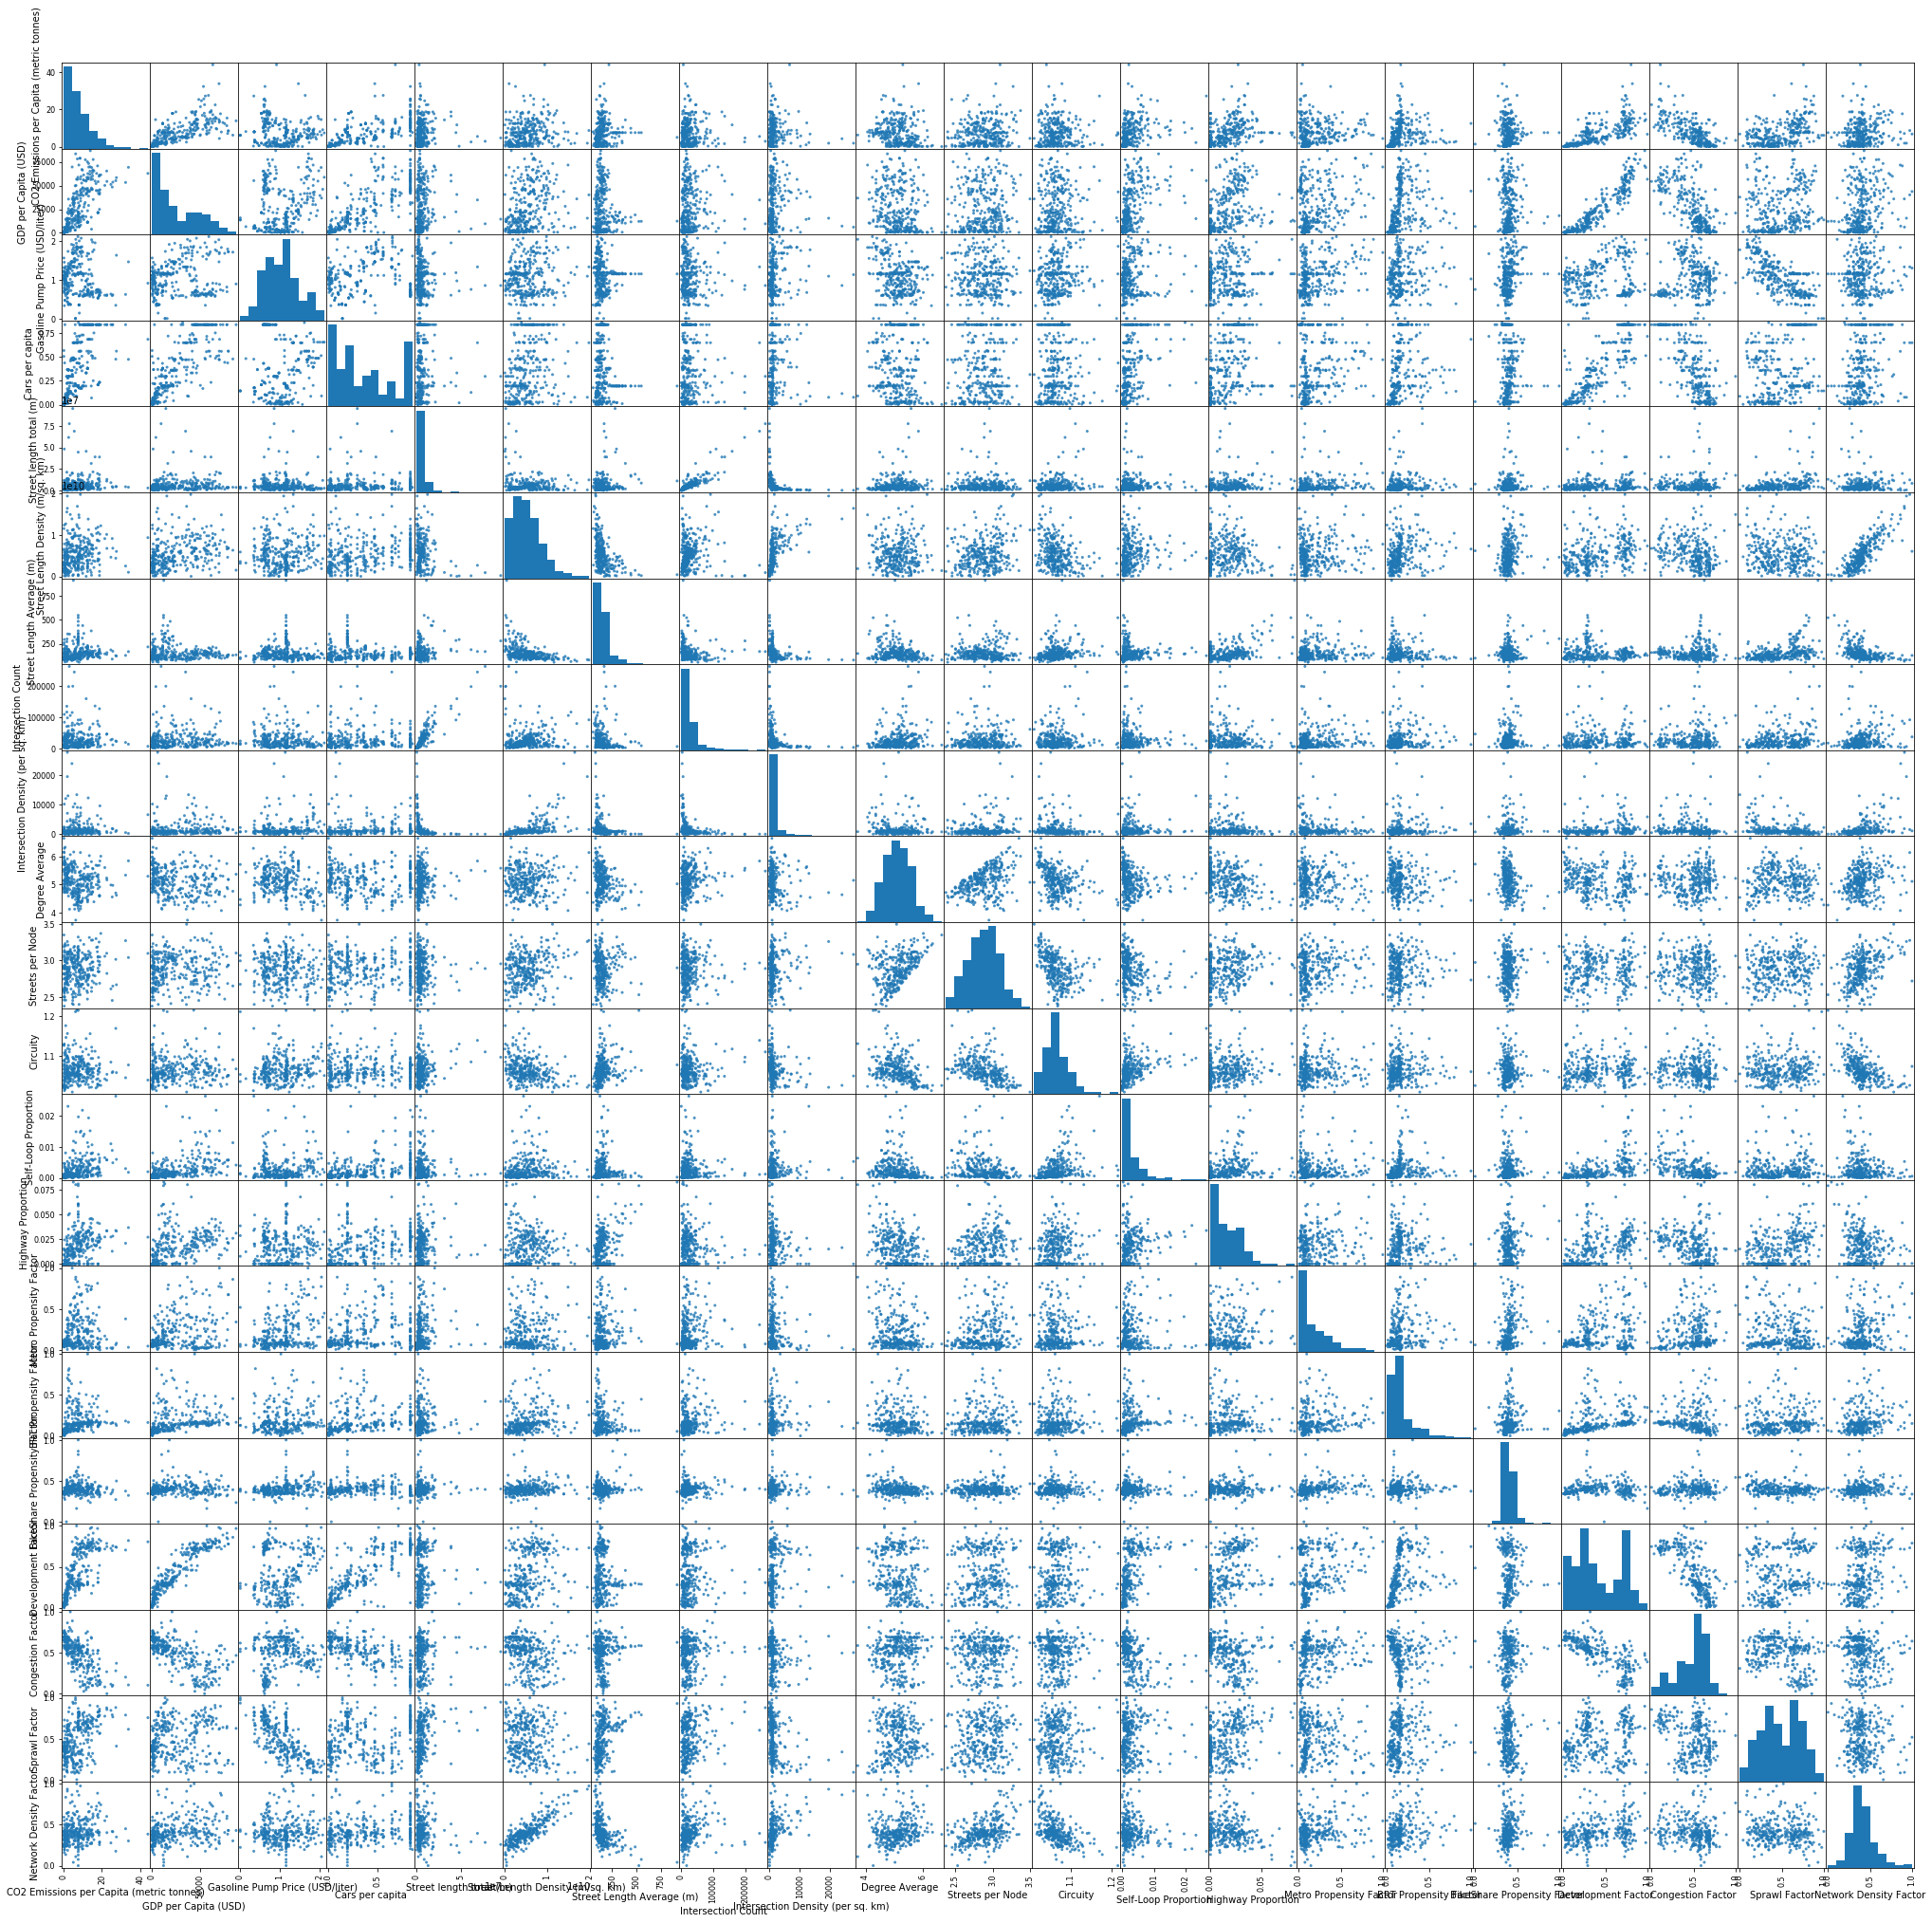

In [43]:
pd.plotting.scatter_matrix(df_gasoline,figsize=(35,35), alpha=0.8)

In [46]:
from sklearn import decomposition

In [47]:
# Define the standardization function.
def standardize_dataframe(df_in):
    return (df_in-df_in.mean())/df_in.std()

In [48]:
# PCA inputs without filtering:
df_target = df_gasoline['Gasoline Pump Price (USD/liter)']
df_inputs = standardize_dataframe(df_gasoline.drop('Gasoline Pump Price (USD/liter)', axis=1))

Text(0.5, 1.0, 'Cumulative Variance Explained (%)')

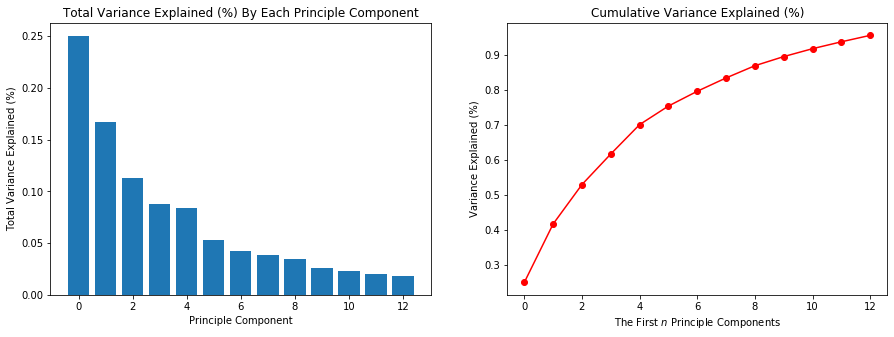

In [799]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)

pca.fit(df_inputs)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].bar(range(len(expl)),pca.explained_variance_ratio_)
ax[0].set_xlabel('Principle Component')
ax[0].set_ylabel('Total Variance Explained (%)')
ax[0].set_title('Total Variance Explained (%) By Each Principle Component')


ax[1].plot(range(len(expl)), cdf, marker='o', color='r');
ax[1].set_xlabel('The First $n$ Principle Components')
ax[1].set_ylabel('Variance Explained (%)')
ax[1].set_title('Cumulative Variance Explained (%)')

We can reduce number of components to 12 (that is 40% reduction) and maintain more than 95% variance explained! Lets try 10 compotents, which means 50% reduction.

We can perfrom Principal components regression. There is nice package that can provide all neccessary tools
https://hoggorm.readthedocs.io/en/latest/pcr.html

In [23]:
#%pip install hoggorm
#%pip install hoggormplot

In [49]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

The code follows example from: https://github.com/olivertomic/hoggorm/blob/master/examples/PLSR/PLSR_on_NIR_and_octane_data.ipynb

First lets create dataframes

In [96]:
X_df= df[['CO2 Emissions per Capita (metric tonnes)','GDP per Capita (USD)','Cars per capita','Street length total (m)', 'Street Length Density (m/sq. km)',\
'Street Length Average (m)', 'Intersection Count', 'Intersection Density (per sq. km)',\
'Degree Average', 'Streets per Node', 'Circuity', 'Self-Loop Proportion', 'Highway Proportion',\
'Metro Propensity Factor', 'BRT Propensity Factor', 'BikeShare Propensity Factor', 'Development Factor',\
 'Congestion Factor','Sprawl Factor', 'Network Density Factor']]
y_df=df[['Gasoline Pump Price (USD/liter)']]

In [97]:
# Get the values from the data frame
X = X_df.values
y = y_df.values

# Get the variable or columns names
X_varNames = list(X_df.columns)
y_varNames = list(y_df.columns)

# Get the object or row names
X_objNames = list(X_df.index)
y_objNames = list(y_df.index)

Apply PLSR to our data, use our optimal number of componenets=10


In [99]:

model = ho.nipalsPLS1(arrX=X, Xstand=True, 
                      vecy=y,
                      cvType=["KFold", 10], 
                      numComp=10)

KFold


In [100]:
 model.regressionCoefficients()

array([[-0.03674904],
       [ 0.04738888],
       [ 0.00166259],
       [-0.01885949],
       [ 0.0199268 ],
       [-0.00596757],
       [-0.01732573],
       [ 0.03390197],
       [-0.06563929],
       [-0.00993094],
       [ 0.02817778],
       [ 0.01623764],
       [ 0.02249867],
       [ 0.09309305],
       [ 0.02062147],
       [ 0.06042275],
       [ 0.04892424],
       [ 0.02006146],
       [-0.18619877],
       [ 0.00557534]])

In [101]:
model.X_RMSEE()


array([7.78403335e+08, 7.34758367e+08, 5.38587281e+08, 5.34703157e+08,
       4.76756995e+08, 4.40685495e+08, 3.25755537e+08, 3.24677920e+08,
       2.95031586e+08, 2.92451382e+08, 2.52333869e+08])

In [102]:
model.Y_RMSEE()

array([0.4251582 , 0.28034766, 0.24640634, 0.21508546, 0.20454705,
       0.19918413, 0.19552457, 0.19267259, 0.1918328 , 0.19116793,
       0.19035854])

Besides first 2 components, root mean square error of estimates look quite reasonable, oscilating arround 0.20

In [115]:
model.X_scores().mean()

-8.841655653942512e-17

In [113]:
model.Y_scores()

Not implemented


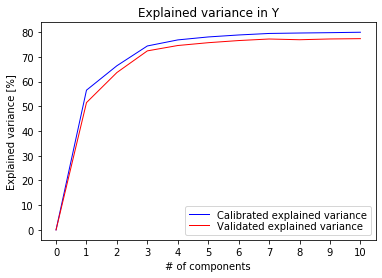

In [103]:
# Plot cumulative explained variance (both calibrated and validated) using a specific function for that.
hop.explainedVariance(model)

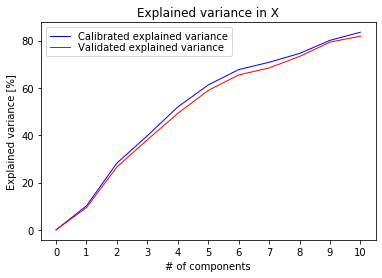

In [104]:
# Plot cumulative validated explained variance in X.
hop.explainedVariance(model, which=['X'])

In [105]:
X_scores = model.X_scores()
print(X_scores)

[[-0.35789292 -2.05700947  1.2247395  ... -0.0636568  -0.12809135
  -0.42407098]
 [-0.2859806  -1.29563437  1.02547283 ... -0.19370848  0.84829908
   1.23510891]
 [-1.07507877  1.67598248  0.22209662 ... -0.03729681 -0.47834258
  -0.45084508]
 ...
 [ 0.07125113  0.94774801  1.05750223 ...  0.09650955  0.3529086
   0.15584147]
 [ 0.36032022  0.59966529  0.60717817 ... -0.03836788 -0.08957638
  -0.10934183]
 [-0.76380106 -0.40322923 -1.05701509 ...  0.47788554  0.55549308
  -0.0224013 ]]


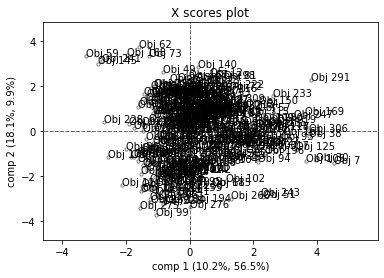

In [106]:
hop.scores(model)

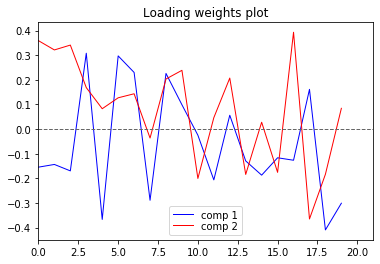

In [107]:
# Plot X loadings in line plot
hop.loadings(model,comp=[1,2], weights=True, line=True)

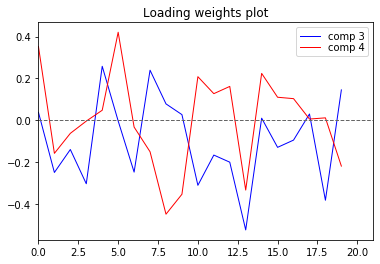

In [80]:
hop.loadings(model,comp=[3,4], weights=True, line=True)

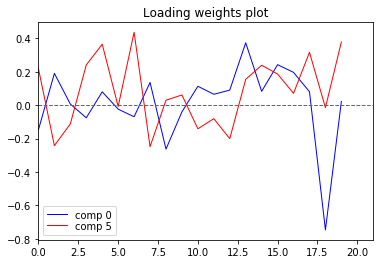

In [81]:
hop.loadings(model,comp=[0,5], weights=True, line=True)

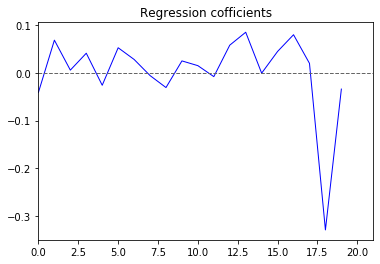

In [82]:
# Plot regression coefficients
hop.coefficients(model, comp=[3])

It's interesting to see how regression coefficient osiclates, as you can see on the plots above, there is always drop arround point x=17.

## Clasification of country based on transport infrastructure data
Lets reformulate the question to classification problem. Based on ,modeshares,transport infrastructure and socio-economic statistics, can we identify the country? With what accuracy?

In [129]:

from sklearn.preprocessing import LabelEncoder

def multi_label_encoder(df, cols2code):
        encoder = LabelEncoder()
        for col in cols2code:
            df[col+'(Encoded)'] = encoder.fit_transform(df[col])
        return df
    
df = multi_label_encoder(df, ['Country'])
df.head()

City  cityID  clusterID            Typology        Country  \
0  Baltimore(MD)   285.0        7.0         Auto Sprawl  United States   
1      Melbourne    10.0        8.0     Auto Innovative      Australia   
2         Niamey   186.0        1.0  Congested Emerging          Niger   
3          Hanoi   328.0       12.0  MetroBike Emerging        Vietnam   
4         Urumqi    67.0       12.0  MetroBike Emerging          China   

   Car Modeshare (%)  Public Transit Modeshare (%)  Walking Modeshare (%)  \
0               85.0                           6.1                    2.6   
1               80.0                          14.0                    4.0   
2               44.0                           9.0                   60.0   
3                8.0                          10.0                   33.3   
4               21.7                          54.7                    6.6   

   Gasoline Pump Price (USD/liter)  Road Deaths Rate (per 1000)  \
0                             0.66                          8.5   
1                             1.11                          5.4   
2                             1.02                         26.4   
3                             0.90                         24.5   
4                             1.16                         18.8   

   Subway Length (km)  Subway Length Density (per km)  \
0                24.9                        0.013409   
1                 0.0                        0.000000   
2                 0.0                        0.000000   
3                 0.0                        0.000000   
4                 0.0                        0.000000   

   Subway Stations per Hundred Thousand  Subway Ridership per Capita  \
0                              0.615385                     6.417582   
1                              0.000000                     0.000000   
2                              0.000000                     0.000000   
3                              0.000000                     0.000000   
4                              0.000000                     0.000000   

   Subway Age (years)  BRT Length (km)  BRT System Length Density (per km)  \
0                34.0              0.0                            0.000000   
1                 0.0              0.0                            0.000000   
2                 0.0              0.0                            0.000000   
3                 0.0             14.5                            0.067073   
4                 0.0             66.0                            0.134146   

   BRT Stations per Hundred Thousand Persons  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.143000   
4                                   2.537764   

   BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
0                                0.000000                         0.000000   
1                                0.000000                         0.000000   
2                                0.000000                         0.000000   
3                                4.561934                         0.149000   
4                                9.123867                        34.441088   

   BRT Age (years) Bikeshare Stations  \
0              0.0                 50   
1              0.0                 50   
2              0.0                  0   
3              1.0                  0   
4              7.0                  0   

   Bikeshare Stations per Hundred Thousand Persons  Bikeshare Number of Bikes  \
0                                         2.197802                        NaN   
1                                         1.264223                      600.0   
2                                         0.000000                        0.0   
3                                         0.000000                        0.0   
4                                         0.00

In [145]:
from sklearn.model_selection import train_test_split

transport_analysis = df[['Country(Encoded)','Gasoline Pump Price (USD/liter)','Car Modeshare (%)', 'Public Transit Modeshare (%)',\
                         'Walking Modeshare (%)', 'Subway Length (km)', 'BRT Length (km)',\
                         'Street length total (m)', 'Road Deaths Rate (per 1000)', 'GDP per Capita (USD)']]

transport_analysis_nonan = df[['Country(Encoded)','Gasoline Pump Price (USD/liter)','Car Modeshare (%)', 'Public Transit Modeshare (%)',\
                         'Walking Modeshare (%)', 'Subway Length (km)', 'BRT Length (km)',\
                         'Street length total (m)', 'Road Deaths Rate (per 1000)', 'GDP per Capita (USD)']].dropna()

transport_analysis_target = transport_analysis_nonan['Country(Encoded)'].astype(int)
transport_analysis_inputs = transport_analysis_nonan.drop('Country(Encoded)' , axis = 1)

In [146]:
x_train,x_test,y_train,y_test = train_test_split(transport_analysis_inputs,transport_analysis_target, test_size = 0.25 )

In [147]:
from sklearn.linear_model import SGDClassifier

regr = SGDClassifier()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.07228915662650602

In [148]:
transport_analysis.tail()

Country(Encoded)  Gasoline Pump Price (USD/liter)  Car Modeshare (%)  \
327                99                             1.19          53.133333   
328                38                             1.05          37.566667   
329               111                             1.47          22.000000   
330               111                             1.48          30.000000   
331                99                             1.16          47.700000   

     Public Transit Modeshare (%)  Walking Modeshare (%)  Subway Length (km)  \
327                     30.266667                   13.4                 0.0   
328                     43.133333                   16.2                 0.0   
329                     56.000000                   19.0                 0.0   
330                     57.000000                   12.0                64.3   
331                     35.000000                   12.2                 0.0   

     BRT Length (km)  Street length total (m)  Road Deaths Rate (per 1000)  \
327              0.0              5657313.906                         25.1   
328              0.0              3122985.041                         26.2   
329              0.0              6039888.052                          8.3   
330              0.0              7068465.131                          7.5   
331             17.0              4570701.927                         25.1   

     GDP per Capita (USD)  
327                8221.0  
328                1707.7  
329               19886.0  
330               21076.0  
331               14086.0

In [149]:
y_test.shape

(83,)

In [150]:
y_train.shape

(249,)

In [151]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, max_depth=15, random_state = 0)
rf.fit(x_train, y_train)

print(rf.score(x_test, y_test))

0.5060240963855421


In [152]:
y_pred=rf.predict(x_test)
print(y_pred)

[ 18  21  92  46   3  43 120 116  86  18  36 111  78  99  49  13  48 116
  18  30  21  93  13   8  41 116  54 116  21 101 116 116 116  21  21  59
  18  46  68  66 101  85  38 115  90   8  54  37  68  68 116  90  18 116
  68  37 116 116 116 116  21  51  27 116 116 100 116  68  46  37  46 122
  86  54  21  48 116  35  72  57  35  51 114]


In [153]:
np.sqrt(sum(rf.predict(x_test,)-y_test)**2)

609.0

In [154]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [155]:
# Getting the score for our model
rf.score(x_test, y_test)

0.5060240963855421